# 사이킷런 소개와 특징

    사이킷런(scikit-learn)은 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공
    오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리
    파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 파이썬스러운 API를 제공
   

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import sklearn

print(sklearn.__version__)

0.21.2


# 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

    붓꽃 품종을 예측하기, 분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나입니다.
    
    sklearn.datasets 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임입니다.
    
    sklearn.tree 내의 모듈은 트리 기 ML 알고리즘을 구현한 클래스의 모임입니다.
    
    sklearn.model_selection은 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한
    다양한 모듈의 모임 입니다.
    
    데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데는 train_test_split) 함수를 사용할 것입니다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
# load_iris() 함수를 이용해 붓꽃 데이터 세트를 로딩한 후, 피처들과 데이터 값이 어떻게 구성돼 있느지 확인

import pandas as pd

# 붓꽃 데이터 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(Feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target

print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환 합니다.
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(10)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
iris_df['label'] = iris_df['label'].apply(lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica')) 

In [24]:
iris_df['label']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

다음으로 학습용 데이터와 테스트용 데이터를 분리해 보겠습니다.
train_test_split() API를 활용하여 파라미터 test_size 파라미터 입력 값의 비율로 쉽게 분할합니다.
테스트 데이터 비율을 20%, 학습 데이터 비율을 80%로 분할하려면 test_size = 0.2로 입력 설정하면 됩니다. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

    train_test_split()의 첫 번째 파라미터인 iris_data는 피처 데이터 세트입니다. 두 번째 파라미터인 iris_label은 레이블(Label) 데이터 세트 입니다. 그리고 test_size=0.2는 전체 데이터 세트중 테스트 세트의 비율입니다. 마지막 random_state는 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값입니다.

데이터를 확보 했으니 이 데이터를 기반으로 머신러닝 분류 알골리즘의 하나인 의사 결정 트리를 이용해 학습과 예측을 수행해 보겠습니다.
먼저 사이킷런의 의사 결정 트리 클래스인 DecisionTreeClassifier를 객체로 생성합니다.( DecisionTreeClassifier 객체 생성 시 입력된 random_state = 11 역시 예제 코드를 수행할 때마다 동이한 학습/예측 결과를 출력하기 위한 용도로만 사용 됩니다.)
DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정 값 데이터 세트를 입력해 호출하면 학습을 수행합니다.

In [6]:
# DecissionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행

df_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

    학습 완료, 예측을 위한 test용 데이터를 이용 predict()

In [10]:
# 학습이 완료된 DecissionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.

pred = df_clf.predict(X_test)

예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능을 평가해 보겠습니다.

성능 평가에 여러 지표가 있지만 여기서는 정확도를 활용해 보겠습니다.

accuracy_score() 함수를 활용, 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력.

In [11]:
from sklearn.metrics import accuracy_score
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9333


    학습한 의사 결정 트리의 알고리즘 예측 정확도가 약 93%으로 측정 됐습니다.
    
    예측의 프로세스
    1. 데이터 세트 분리 : 데이터를 학습 데이터와 데스트 데이터로 분리합니다.
    2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킵니다.
    3. 예측 수행 : 학습된 ML 모델을 이용해 테스트의 분류를 예측합니다.
    4. 평가 : 이렇게 예측된 결괏값과 테슽 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가합니다.

# 사이킷런의 기반 프레임워크 익히기

#### Estimator 이해 및 fit(), predict() 메소드

    사이킷런은 API의 일관성과 개발 편의성을 제공하기 위한 노력이 엿보이는 패키지 입니다.
    사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공 합니다.
    사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier와 Regressor 클래스를 제공합니다. 이들 Classifier와 Regressor를
    합쳐서 Estimator 클래스라고 부릅니다.
    
    사이킷런의 비지도 학습인 차원 축소, 클러스터링, 피처 추출(Feature Extracion) 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용합니다. 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 과정입니다. fit()으로 변환을 위한 사전구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행 합니다. 사이킷런은 fit()과 transform()을 하나도 결합한 fit_tranform()도 함께 제공합니다.

Estimatot Class 학습 : fit()  예측 : predict()

분류 Classifier -> 분류 클래스 DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, GaussianNB, SVC

회귀 Regressor -> 회구 클래스 LinearRegression, Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor

#### 사이킷런의 주요 모듈
    
    모듈의 요약, 자주 사용하는 핵심 모듈 위주

##### 예제 데이터

sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트

##### 피처 처리

sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공 (문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일등)
    
sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀력션 작업을 수행하는 다양한 기능 제공
    
sklearn.feature_extractioin : 

텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨.예를 들어 텍스트 데이터에서 Count Vectorize나 TF_IDF Vectorize 등을 생성하는 기능 제공. 텍스트 데이터의 피처 추출을 sklearn.feature_extraction.text 모듈에,이미지 데이터의 피처 추출은 sklearn.feature_extraction.image 모듈에 지원 API가 있음

##### 피처 처리  & 차워 축소
sklearn.decomposition : 차원 축소와 관련한 알고리즘을 지워 하는 모듈임. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능을 수행할 수 있음

##### 데이터 분리, 검증 & 파라미터 튜닝
sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치(Grind Search)로 최적 파라미터 추출 등의 API 제공

##### 평가
sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈(Pairwise)에 대한 다양한 성능 측정 방법 제공. Accuracy, Precision, Recall, ROC-AUC, RMSE 등 제공

##### ML 알고리즘

sklearn.ensemble : 앙상블 알고리즘 제공, 랜덤 포레스트, 에이다 부스트,그래디언트 부스팅 등을 제공

sklearn.linear_model : 

주로 선형 회귀, 릿지(Ridge), 라쏘(Lasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원. 또한 SGD(Stochastic Gradient Descent) 관련 알고리즘도 제공

sklearn.naive_bayes : 나이즈 베이즈 알고리즘 제공. 가우시안 NB, 다항 분포 NB 등.

sklearn.neighbors : 최근접 이웃 알고리즘 제공. K-NN등

sklearn.svm : 서포트 벡터 머신 알고리즘 제공

sklearn.tree : 의사 결정 트리 알고리즘 제공

sklearn.cluster : 비지도 클러스터링 알고리즘 제공 (K-means, 계층형, DBSCAN등)

##### 유틸리티
sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공

일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/ 예측 수행, 그리고 모델 평가의 단게를 반복적으로 수행 하는 것입니다.

#### 내장된 예제 데이터 세트

    사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장돼 있습니다. 이 데이터는 datasets 모듈에 있는 여러 API를 호출해 만들 수 있습니다.

분류나 회귀 연습용 예제 데이터

datasets.load_boston() : 회귀 용도이며, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트

datasets.load_breast_cancer() : 분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트

datasets.load_diabetes() : 회귀 용도이며, 당뇨 데이터 세트

datasets.load_digits() : 분류 용도이며, 0 에서 9까지 숫자의 이미지 픽셀 데이터 세트

datasets.load_iris() : 분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트

fetch 계열의 명령은 데이터의 크기가 커서 패캐지에 처음부터 저장돼 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉토리에 저장ㅇ한 후 추후 불러들이는 데이터입니다.

fetaach_covtype() : 회귀 분석용 토지 조사 자료

fetach_20newsgroups() : 뉴스 그룹 텍스트 자료

fetach_olicetti_faces() : 얼굴 이미지 자료

fetach_lfw_people() : 얼굴 이미지 자료

fetach_lfw_pairs() : 얼굴 이미지 자료

fetach_rcv1() : 로이터 뉴스 말뭉치

fetach_mldata() : ML 웹사이트에서 다운로드

분류와 클러스터링을 위한 표본 데이터 생성기

datasets.make_classifications() : 분류를 위한 데이터 세트를 만듭니다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해 줍니다.

datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성해 줍니다. 군집 지정 재수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어 줍니다.


사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태로 돼 있습니다.

키는 보통 data, target, target_name, feature_names, DESCR로 구성돼 있습니다. 개별 키가 가리키는 데이터 세트의 의미는 다음과 같습니다.

-data는 피처의 데이터 세트를 가리킵니다.

-target은 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트입니다.

-target_names는 개별 레이블의 이름을 나타냅니다.

-feature_names는 피처의 이름을 나타냅니다.

-DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타냅니다.



data, target은 넘파이 배열(ndarray) 타입이며, target_names, feature_names는 넘파이 배열 또는 파이썬 리스트 타입입니다.

DESCR은 스트링 타입입니다. 피처의 데이터 값을 반환 받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key 값을 지정하면 됩니다.


In [13]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


    load_iris() API의 반환 결과는 sklearn.utils.Bunch 클래스 입니다. Bunch 클래스느 파이썬 딕셔너리 자료형과 유사합니다.
    데이터 세트에 내장돼 있는 대부분의 데이터 세트는 이와 같이 딕셔너리 형태의 값을 반환 합니다.

In [14]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


    데이터 키는 피처들의 데이터 값을 가르킵니다. 데이터 세트가 딕셔셔너리 형태이기 때문에 피처 제이터 값을 추출하기 위해서는 데이터 세트.data(또는 데이터 세트['data'])를 이용하면 됩니다. 마찬가지로 다른 데이터 값의 추출도 동일합니다.

load_irs()가 반환하는 객체의 키인 feature_names, target_name, data, target이 가르키는 값을 다음 예제 코드에 출력합니다

In [23]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.feature_names))
print(' target_names의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:',type(iris_data.data))
print(' data의 shape:', iris_data.data.shape)
print(iris_data['data'][:6])

print('\n target 의 type:', type(iris_data.target))
print(' target 의 shape:', iris_data.target.shape)
print(iris_data.target[:6])


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'list'>
 target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
 data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]

 target 의 type: <class 'numpy.ndarray'>
 target 의 shape: (150,)
[0 0 0 0 0 0]


# Model Selection 모듈 소개

    사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공 합니다.

#### 학습/ 테스트 데이터 세트 분리 - train_test_spilt()

    train_test_split()는 첫 번째 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트를 입력 받습니다. 그리고 선택적으로 다음 파라미터를 입력 받습니다.
    
    test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마나 샘플링할 것인가를 결정합니다. default=0.25 입니다.
    train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마나 샘플링할 것인가를 결정합니다.
    shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정 합니다. default=True입니다. 데이터를 분산 시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는데 사용됩니다.
    random_state : random_state는 호촐할때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값입니다.
    train_test_split()의 반환값은 튜플 형태입니다. 수차적으로 학습용 데이터의 피처 데이터 세트. 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 레이블 데이터 세트가 반환됩니다.

In [28]:
# 붓꽃 데이터를 train_test_split()를 이용하여 테스트 데이터 세트를 전체 30%로 하고 random_state=121로 변경해 데이터 세트를 변화 시켜 보겠습니다.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.3,random_state=121) 

In [29]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9556


    정확도가 약 95.56%입니다. 붓꽃 데이터는 150개 데이터로 데이터 양이 크지 않아 성능 예측 판단하기에 그리 적절하지 않습니다.
    학습을 위한 데이터의 양을 일정 수준이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로
    예측 성능을 평가해 보는 것도 중요합니다.

#### 교차 검증

    성능 예측을 위한 모델 학습도 고정된 학습 데이터와 테스트 데이터로 평가 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 우도하는 경향이 생깁니다. 결국 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트 데이터가 들어올 경우에는 성능이 저하 됩디더. 이러한 무저젬을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행합니다.
    
    교차 검증은 테스트 데이터 세트에 대해 평가를 하기 전에 학습 데이터를 검증과 학습 데이터로 나누어서 여러번의 검증을 실행

#### K-폴드 교차 검증

    가장 보편적인 교차 검증 기법 입니다. 먼저 K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법입니다.
    
    K가 5일 때, 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경 하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가합니다. 5개중 하나씩 검증 데이터로 남겨두고 나머지를 학습 하여 검증 데이터로 평가 해가며 
    성능 결과를 평균 합니다.
    
    KFold와 StratifiedFold 클래스를 통해 교차 검증을 실시

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
feature = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',feature.shape[0])

붓꽃 데이터 세트 크기: 150


KFold로 객체를 생성했으니 KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리합니다.

In [37]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(feature):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = feature[train_index], feature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('\n#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
    # 개별 iteration별 정확도를 합하여 평균 정확도 계산
    print('\n## 평균 검증 정확도', np.mean(cv_accuracy))


#1 교차 검증 정확도:1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 평균 검증 정확도 1.0

#2 교차 검증 정확도:0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 평균 검증 정확도 0.98335

#3 교차 검증 정확도:0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 평균 검증 정확도 0.9444666666666667

#4 교차 검증 정확도:0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 평균 검증 정확도 0.941675

#5 교차 검증 정확도:0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 0.9


    5번 교차 검증의 평균 정확도는 0.9 입니다. 그리고 교차 검증 시마다 검증 세트의 인덱스가 달라짐을 알 수 있습니다.

#### Stratified K 폴드

    stratified K 폴드는 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식입니다.
    불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말합니다.
    가령 대출 사기 데이터를 예측한다고 가정해 보겠습니다. 이 데이터 세트는 1억 건이고, 수십 개의 피처와 대출 사기 여부를 뜻하는 레이블(대출 사기: 1, 정상 대출 :0)로 구성돼 있습니다. 대출 사기가 약 1000건 있다고 한다면 전체의 0.0001%의 아주 작은 확률로 대출 사기 레이블이 존재합니다. 이렇게 작은 비율로 1 레이브 값이 있다면 K 폴드로 랜덤학 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값이 0과 1의 비율로 제대로 반영 하지 못할는 경우가 쉽게 발생합니다. 따라서 원본 데이터와 유사한 대출 사기 레이블 값의 분포를
    학습/테스트 세트에도 유지하는 게 매우 중요합니다.
    
    Stratified K 폴드는 이처럼 K 폴드가 레이블 데이터 집합이 워본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우 문제를 해결해 줍니다.

In [39]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n',label_test.value_counts(),'\n')
    
print(iris_df['label'].value_counts())

StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 줍니다.

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블:\n',label_train.value_counts())
    print('검증 레이블:\n',label_test.value_counts())

StratifiedKFold를 이용해 데이터를 분리한 것입니다.

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
features = iris.data
label = iris.target

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score

In [5]:
dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

#StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n #{0} 교차 검증 정확도 :{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('# {0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n ##교차 검증별 정확도:', np.round(cv_accuracy,4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))




 #1 교차 검증 정확도 :0.9804, 학습 데이터 크기:99, 검증 데이터 크기:51
# 1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]

 #2 교차 검증 정확도 :0.9216, 학습 데이터 크기:99, 검증 데이터 크기:51
# 2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133]

 #3 교차 검증 정확도 :0.9792, 학습 데이터 크기:102, 검증 데이터 크기:48
# 3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 ##교차 검증별 정확도: [0.9804 0.9216 0.9792]
## 평균 검증 정확도: 0.9604


    StratifiedKFold의 경우 워본 데이터의 레이블 분포도 특성을 반영하여 학습 및 검증 데이터 세트를 만들 수 있이므로 왜곡된
    레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해여 합니다.

#### 교차 검증 보다 간편하게 - cross_val_score()
    
    사아킷런 교자 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공합니다. 
    대표적으로 cross_val_score(), KFold는 폴드 세트 수정, for 루프에서 반복으로 테스트,트레인 인덱스 색출, 반복적으로 학습과 예측을 수행하고 예측 성능을 반환. 그러나 cross_val_score()는 이런 일련의 과정을 한꺼번에 수행해주는 API입니다.
    cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    
    estimator는 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미하고, X는 피처 데이터
    세트, y는 레이블 데이터 세트, scoring은 예측 성능 평가 지료를 기술하며, cv는 교차 검증 폴드 수를 의미합니다.
    
    classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할 합니다.
    (회귀의 경우는 Stratified K 폴드 방식으로 분할 할 수 없으므로 K 폴드 방식으로 분할)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
score = cross_val_score(dt_clf, data, label, scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(score,4))
print('평균 검증 정확도:',np.round(np.mean(score),4))

교차 검증별 정확도: [0.9804 0.9216 0.9792]
평균 검증 정확도: 0.9604


    cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환합니다.
    cross_val_score()는 내부적으로 fit, predict, evaluation 시켜주므로 간단하게 교차 검증을 수행할 수 있습니다.
    
    비슷한 API로 cross_vlidate()는 여러 개의 평가 지표를 반환할 수 있습니다. 또한 학습 데이터에 대한 성능 평가 지표와 수행 시간도 제공 합니다.

#### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

    사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력 하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공합니다.
    예를 들어 결정 트리 알고리즘의 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터를 조합을 찾고자 한다면 다음 처럼 집합을 만들어 순차적을 적용하면서 최적화를 수행할 수 있습니다.

In [8]:
grid_parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

    하이퍼 파라미터는 총 6회에 걸쳐 [1,2],[1,3],[2,2],[2,3],[3,2],[3,3]를 순차적 실행 결과를 도출할 수 있습니다.
    즉, cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해줍니다.

GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터는 다음과 같습니다.

estimator : classifier, regressor, pipeline이 사용될 수 있습니다.

param_grid : key + 리스트 값을 가지는 딕셔너리가 주어집니다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정합니다.

scoring : 예측 성능을 측정할 평가 방법을 지정합니다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자여(예:정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있습니다.

cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정합니다.

refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 시킵니다.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

#데이터 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

학습 데이터 세트를 GridSearchCV 객페의 fit(학습 데이터 세트) 메서드에 인자로 입력 합니다.
GridSearchCV 객체의 fit(학습 데이터 세트) 메서드를 수행하면 학습 데이터를 cv에 기술된 폴딩 셑로 분할해 param_grid에 기술되 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_results_속성에 기록합니다.

In [4]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)

#GrindSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


    총 6개의 결과를 볼 수 있으며, 이는 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 학습 및 평가를 수행했음을 나타냅니다. 
    params : 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터값을 나타냅니다.
    rank_test_score : 하이퍼 파리미터별로 성능이 좋은 score 순위를 나타냅니다. 1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터 입니다.
    mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 통 수행한 평가 평균값입니다.

GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params, best_score_ 속성에 기록됩니다.

In [5]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


max_depth가 3, min_samples_split 2일 때 검증용 폴드 세트에서 평균 최고 정확도가 측정, GridSearchCV 객체의 생성 파라미터로 refit=True가 디폴트입니다.
   
refit=True이면 GridSearchCV가 최적 성능 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장합니다.
    
이미 학습된 best_estimator_를 이용해 앞으로 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측 하고 성능 평가

In [9]:
# GirdSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


    일반적으로 학습데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법입니다.

# 데이터 전처리
    
    ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있습니다.(Garbage In, Garbage Out)
    결손값, 즉 NaN, NULL 값은 허용되지 않습니다. 따라서 이러한 Null 값은 고정된 다른 값으로 변환해야 합니다. Null 값을 어떻게 처리해야 할지는 경우에 따라 다릅니다. 경우에 따라 평균값, Null이 많은 피처의 드랍, Null 값이 일정 수준 이상 되는 경우가 가장 복잡


#### 데이터 인코딩

    머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원-핫 인코딩(One Hot encoding)이 있습니다.
    레이블 인코딩은 상품 구분과 값으로 돼 있습니다.(TV:1, 냉장고:2, 컴퓨터:3 ..)
    
##### 레이블 인코딩
    
    사이킷런의 레이블 인코딩(Label encoding)은 LabelEnocoder 클래스로 구현합니다. LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행합니다.

In [3]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEnoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


    데이터가 작아서 직관적으로 알 수 있지만, 많은 경우에 이를 알지 못한다. 이 경우에는 LabelEncoder 객체의 classes_ 속성값으로 확인하면 됩니다.

In [4]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


    inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있습니다.

In [5]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


##### 원-핫 인코딩(One Hot Encoding)

    원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시 하고 나머지 칼럼에는 0을 표시하는 방식입니다. 
    원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환이 가능합니다. 단, LabelEncoder와 다르게 약간 주의할 점이 있습니다. 첫 번째는 OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다는 것이며, 두 번째는 입력 값으로 2차원 데이텉가 필요하다는 점입니다. OneHotEncoder를 이용해 앞의 데이터를 원-핫 인코딩으로 변화해 보겠습니다.

In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1,1)
#print(labels)
# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


C:\Users\dogun\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


    8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환됐습니다. 판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있습니다. get_dummies()를 이용하면 됩니다. 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환할 수 있습니다.

In [8]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


    get_dummies()를 이용하면 숫자형 값으로 변환 없이도 바로 변환이 가능함을 알 수 있습니다.

#### 피쳐 스케일링과 정규화

    서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 합니다.
    대표적인 방법으로 표준화(Standardization)와 정규화(Normalization)가 있습니다.
    
    표준화 : 데이터의 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것을 의미합니다.
    정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념입니다. 피처가 거리와 가격일 때, 다른 단위 값들을 예를 들어 0~1의 범위로 축소 하는 등의 방식. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것입니다.

#### StandardScaler

    StandardScaler는 앞에서 설명한 표준화를 쉽게 지원하기 위한 클래스입니다. 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해줍니다. 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환 하는 것은 몇몇 알고리즘에서 매우 중요합니다. 특히 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vecot Machine)이나 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있습니다.

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\n feature 들의 분산값 ')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

 feature 들의 분산값 
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환하겠습니다. StandardScaler 객체를 생성한 후에 fit()과 transform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변화됩니다.

In [4]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


    모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐음을 알 수 있습니다.

#### MinMaxScaler

    다음으로 MinMaxScaler에 대해 알아보겠습니다. MinMaxScaler는 데이터 값을 0과 1사이의 범위 값으로 변환합니다(음수 값이 있으면 -1에서 1값으로 변환합니다). 데이터 분포가 가우시안 분포가 아닐 경우에 Min, Max  Scaler을 적용해 볼 수 있습니다. MinMaxScaler가 어떻게 동작하는지 확인해 보겠습니다.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


    모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있습니다.

#### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
    
    StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용합니다.
    일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정등)을 적용하며 transform()은 이렇게 설정해 정보를 이용해 데이터를 변환합니다. 그리고 fit_transform()은 fit()과 transform()을 한번에 적용하는 기능을 수행합니다.
    Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다는 것입니다.

다음 코드를 통해 테스트 데이터 fit()을 적용할 때 어떠한 문제가 발생하는지 알아보겠습니다.

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이털는  0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# scaler 클래스의 fit(), transform()은 2차원 이상데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)


    학습 데이터인 train_array는 0부터 10까지 값을 가지는데, 이 객체를 fit() 적용하면 최소값 0, 최댓값 10이 설정되면 1/10 Scale이 적용됩니다. 

In [7]:
# MinMaxScaler 객체에 별도의 feature_range 파아미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


이번에는 테스트 데이터 세트를 변환하는데, fit()을 호촐해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과를 확인해 보겠습니다.

In [8]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


    출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있습니다. 테스트 데이터의 경우는 최솟값 0, 최댓값 5이므로 1/5로 스케일링됩니다. 따라서 원본값 1은 0.2로, 원본값 5는 1로 변환됩니다.

테스트 데이터에 fit()을 호출하지 않고 학습 데이터로 fit()을 수행한 MinMaxScaler 객체의 transform()을 이용해 데이터를 변환합니다.

In [9]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


    fit_transform()을 적용할 때도 마찬가지입니다. fit_transform()은 fit()과 transform()을 순차적으로 수행하는 메소드이므로 학습 데이터에서는 상관없지만 테스트 데이터에서는 절대 사용해서는 안됨. 이렇게 학습과 테스트 데이터에 fit()과 transform()을 적용할 때 주의 사항이 발생하므로 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직 합니다.

학습과 테스트 데이터의 Scale 변환 시 유의할 점 (fit(), transform(), fit_transform())

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트  데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 scaler 객체를 이용해 transform()으로 변환

# 사이킷런으로 수행하는 타이타닉 생존자 예측

    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


    RangeIndex가 891entries이므로 891개의 로우로 구성됩니다. 그리고 칼럼 수는 12개입니다. float64 타입, int64 타입, object 타입
    object 타입은 string 타입으로 봐도 무방합니다. 판다스는 넘파이 기반으로 만들어졌고 넘파이의 String타입이 길이 제한이 있어서 이에 대한 구분을 위해 object 타입으로 명기한 것입니다.

사이킷런 머신러닝 알고리즘은 NULL(NaN) 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 합니다.

In [27]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [28]:
print(' Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N                  687
B96 B98              4
G6                   4
C23 C25 C27          4
F2                   3
E101                 3
D                    3
F33                  3
C22 C26              3
D36                  2
C68                  2
B57 B59 B63 B66      2
B5                   2
D35                  2
B77                  2
C93                  2
F G73                2
E67                  2
C52                  2
B18                  2
B28                  2
F4                   2
E33                  2
E44                  2
B51 B53 B55          2
D33                  2
D17                  2
C83                  2
B35                  2
B58 B60              2
                  ... 
C91                  1
E31                  1
E63                  1
D7                   1
E36                  1
A31                  1
A16                  1
C30                  1
D28                  1
B

    Sex, Embarked 값은 별문제가  없으나, Cabin의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성갑이 제대로 정리가 되지 않은 것 같습니다. 예를 들어 'C23 C25 C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin 값이 4건이 됩니다. 선실의 등급을 나타내는 첫번째 알파벳이 중요해 보입니다. 왜냐하면 이 시절에는 차별이 심했고 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것이기 때문입니다.

In [29]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


수상 사고시에 여성과 아이들 그리고 노약자가 제일 먼저 구조 대상입니다. 그러나 아마도 부자나 유명인이 다음 구조대상이었을 것입니다. 

안타깝게도 삼등실에 탄 많은 사난한 이는 타이타닉 호와 운명을 함께 했을 것입니다.

성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해 보겠습니다.

In [30]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

    0은 사망, 1은 생존입니다.

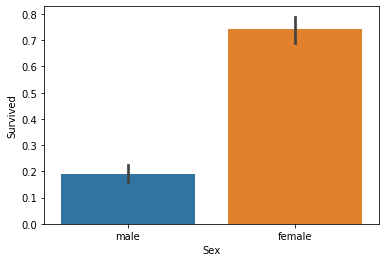

In [31]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

부자와 가난한 사람 간의 생존 확률, 부를 측정할 수 있는 속성으로 적당한 것은 객실 등급일 것입니다.

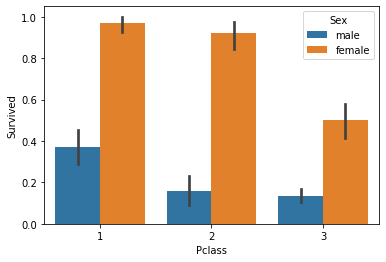

In [33]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df) # hue를 사용하여 데이터를 Sex의 클라스로 분리

    여성의 경우 일, 이등실에 따르 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있습니다.
    남성의 경우는 일등실 생존 확률이 이, 삼들실의 생존 확률보다 월등히 높습니다.

Age에 따른 생존 확률을 알아보겠습니다.

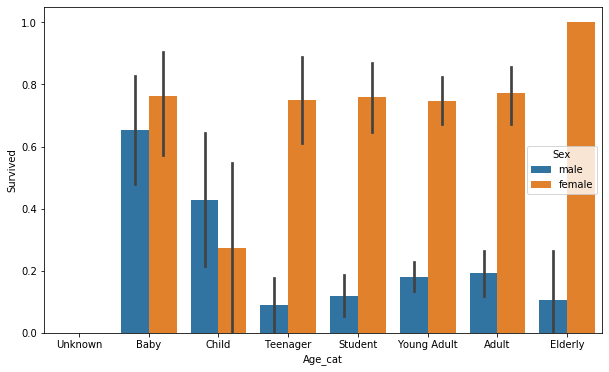

In [35]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat=''
    if age <= -1: cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else : cat='Elderly'
        
    return cat

# 막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat', y='Survived', data=titanic_df, hue='Sex', order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

    여자 Baby의 경우 생존 확률이 높았습니다. 아쉽게도 여자 Child의 경우는 다른 연령대에 비해 생존 확률이 낮습니다.
    그리고 여자 Elderly의 경우는 매우 생존 확률이 높았습니다. 분석 결과 Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임을 어느정도 확인할 수 있다.

남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환. LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0~(카테고리 유형 수 -1) 까지의 숫자 값으로 변환합니다.

사이킷런 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인 fit(), transform()으로 데이터를 변환 합니다.

In [5]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

TypeError: argument must be a string or number

지금까지 피처를 가공한 내역을 정리, 재사용을 위한 함수로 정의(Null처리, 포메팅, 인코딩을 수행하는 내부 함수로 구성)

In [56]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int32
Embarked       891 non-null int32
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


In [68]:
type(titanic_df['PassengerId'][0]) == type(np.int64())

True

In [9]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [10]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레아블 데이터 세트 추출
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis = 1)

X_train_df = transform_features(X_titanic_df)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

ML 알고리즘인 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측해 보겠습니다.


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8324
LogisticRegression 정확도:0.8659


C:\Users\dogun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dogun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 보여줍니다. 아직 최적화 작업과 데이터 양도 충분하지 않기 때문에 어떤 알고리즘의 성능이 가장 뛰어난지 평가할 수는 없습니다.

다음으로 교차 검증으로 결정 트리 모델을 좀 더 평가해 보겠습니다.

앞에서 언급한 model_selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용합니다.

In [17]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores=[]
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습,예측,정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도:{1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도:0.7542
교차 검증 1 정확도:0.7809
교차 검증 2 정확도:0.7865
교차 검증 3 정확도:0.7697
교차 검증 4 정확도:0.8202
평균 정확도: 0.7823


    평균 정확도는 약 78.23%입니다. 다음에는 교차 검증을 cross_val_score() API를 이용해 수행합니다.

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


    cross_val_score()와 바윽ㅁ 전 K 폴드의 평균 정확도가 약간 다른데, 이는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문입니다.

마지막으로 GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해 보겠습니다.

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSeachCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSeachCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


C:\Users\dogun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


    최적화된 하이퍼 파라미터인 max_depth=3, min_samples_split=2, min samples_leaf=1 로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상됐습니다. 하이퍼 파라미터 변경 전보다 약 8% 이상이 증가했습니다. 일반적으로 하이퍼 파리미터를 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵습니다.

# 정리

    사이킷런을 기반으로 머신러닝 애플리케이션을 쉽게 구현해 봤습니다. 사이킷런은 매우 많은 머신러닝 알고리즘을 제공할 뿐만 아니라. 쉽고 직관적인 API 프레임 워크, 편리하고 다양한 모듈 지원등으로 파이썬 계열의 대표적인 머신러닝 패키지로 자리 잡았습니다.
    
    머신러닝 애플리케이션은 데이터의 가공 및 변환 과정의 전처리 작업, 데이터를 학습 데이터와 테스트 데이터로 분히나는 데이터 세트 분리 작업을 거친 후에 학습 데이터 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킵니다. 학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행하고, 이렇게 예측된 결과값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가를 수행하는 방식으로 구성됩니다.
    
    데이터 전처리 작업은 오류 데이터의 보정이나 결손값(Null) 처리 등의 다양한 데이터 클렌징 작업, 레이블 인코딩이나 원-핫 인코딩과 같은 인코딩 작업, 데이커 스케일링/정규화 작업 등으로 사전 처리하는 것입니다.
    
    머신러닝 학습데이터는 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 합니다. 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인  모델의 학습과 평가는 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능서어이 높습니다. 이를 해결하기 위해 학습 데이터 세트를 학습 데이터와 검증 데티어로 구성된 여러 개의 폴드 세트로 분리해 교차 검증을 수행할 수 있습니다. 모델 최적의 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공합니다.
   